# Dynamic optimization
**ECON2125/6012 Lecture 11**
Fedor Iskhakov

## Announcements & Reminders

- None?
## Plan for this lecture

1. Dynamic decision problems
2. Dynamic programming for finite horizon problems
3. Dynamic programming for infinite horizon problems
4. Other classes of dynamic programming problems

**Supplementary reading:**
- Sundaram: chapter 11

## Dynamic decision problems

As before, let's start with our general definition of a general optimization problem

```{admonition} Definition
:class: caution

The general form of the optimization problem is

%
$$
V(\theta) 
= \max_{x} f(x,\theta)
\\
\text {subject to } x \in \mathcal{D}(\theta)
$$
%
where:
- $f(x,\theta) \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}$ is an objective function
- $x \in \mathbb{R}^N$ are decision/choice variables
- $\theta \in \mathbb{R}^K$ are parameters
- $\mathcal{D}(\theta)$ denotes the admissible set
%
$$
\mathcal{D}(\theta) = \left\{ 
x \in \mathbb{R}^N \colon
g_i(x,\theta) = 0, \; i\in\{1,\dots,I\}, \;
h_j(x,\theta) \le 0, \; j\in\{1,\dots,J\}
\right\}
$$
- $g_i(x,\theta) = 0, \; i\in\{1,\dots,I\}$ where $g_i \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}$, are equality constraints
- $h_j(x,\theta) \le 0, \; j\in\{1,\dots,J\}$ where $h_j \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}$, are inequality constraints
- $V(\theta) \colon \mathbb{R}^K \to \mathbb{R}$ is a value function
```

```{admonition} Crazy thought

Can we let the objective function include the value function as a component?
```

- Think of an optimization problem that repeats over and over again, for example in time
- Value function (as the maximum attainable value) of the next optimization problem may be part of the current optimization problems
- The parameters $\theta$ may be adjusted to link these optimization problems together

```{admonition} Example
:class: tip

Imagine the optimization problem with $g(x,\theta)= \sum_{t=0}^{\infty}\beta^{t}u(x,\theta)$ where $b \in (0,1)$ to ensure the infinite sum converges. 
We can write
%
$$
\begin{array}{lll}
V(\theta) & = & \max_x \sum_{t=0}^{\infty}\beta^{t} u(x_t,\theta) \\
& = & \max_x \Big[u(x_0)+\beta\max_x \sum_{t=1}^{\infty}\beta^{t-1}u(x_t,\theta)\Big] \\
& = & \max_x \Big[u(c_{0})+\beta V(\theta)\Big]
\end{array}
$$

```

- Note that the trick in the example above works because $g(x,\theta)$ is an infinite sum
- Among other things this implies that $x$ is infinite dimension!
- Let the parameter $\theta$ to *keep track* time, so let $\theta = (t, s_t)$
- Then it is possible to use the same principle for the optimization problems without infinite sums

Introduce new notation for the value function
%
$$
\theta=(t, s_t) \rightarrow V(\theta) = V(t, s_t) = V_t(s_t)
$$

```{admonition} Definition: dynamic optimization problems
:class: caution

The general form of the *deterministic dynamic optimization* problem is

%
$$
V_t(s_t)
= \max_{x} \big[ f(x,s_t) + \beta V_{t+1}(s_{t+1}) \big] \\
\text {subject to } x \in \mathcal{D}_t(s_t)
$$
%
where:
- $f(x,s_t) \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}$ is an instantaneous reward function
- $x \in \mathbb{R}^N$ are decision/choice variables
- $s_t \in \mathbb{R}^K$ are *state variables*
- state transitions are given by $s_{t+1} = g(x,s_t)$ where $g \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}^K$
- $\mathcal{D}_t(s_t) \subset \mathbb{R}^N$ denotes the admissible set at decision instance (time period) $t$
- $\beta \in (0,1)$ is a discount factor
- $V_t(s_t) \colon \mathbb{R}^K \to \mathbb{R}$ is a value function

Denote the set of maximizers of each instantaneous optimization problem as
%
$$
x^\star_t(s_t) = \mathrm{argmax}_{x \in \mathcal{D}_t(s_t)} \big[ f(x,s_t) + \beta V_{t+1}(s_{t+1}) \big]
$$
%
- $x^\star_t(s_t)$ is called a *policy correspondence* or *policy function*
```

- State space $s_t$ is of primary importance for the economic interpretation of the problem: it encompasses _all_ the information that the decision maker conditions their decisions on
- Has to be carefully founded in economic theory and common sense
- Similarly the transition function $g(x,s_t)$ reflects the exact beliefs of the decision maker about how the future state is determined and has direct implications for the optimal decisions

```{note}
In the formulation above, as seen from transition function $g(x,s_t)$, we implicitly assume that the history of states from some initial time period $t_0$ is not taken into account.
Decision problems where only the current state is relevant for the future are called **Markovian decision problems**
```

### Dynamic programming and Bellman principle of optimality

> An optimal policy has a property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision. \
> 📖 Bellman, 1957 “Dynamic Programming”

```{admonition} Main idea

Breaking the problem into sequence of small problems
```

> Dynamic programming is recursive method for solving sequential decision problems \
> 📖 Rust 2006, *New Palgrave Dictionary of Economics*

- In computer science the meaning of the term is broader: DP is a general algorithm design technique for solving problems with overlapping sub-problems

- Thus, the sequential decision problem is broken into *current decision*
  and the *future decisions* problems, and solved recursively

- The solution can be computed through **backward induction** which is the process of solving a sequential decision problem from the later periods to the earlier ones, this is the main algorithm used in **dynamic programming (DP)**

- Embodiment of the recursive way of modeling sequential decisions is
  **Bellman equation**

```{admonition} Definition
:class: caution

Bellman equation is a *functional equation* in an unknown function $V(\cdot)$ which embodies a dynamic optimization problem and has the form
%
$$
V(\text{state}) = \max_{\text{feasible decisions}} \big[ U(\text{state},\text{decision}) + \beta \mathbb{E}\big\{ V(\text{next state}) \big| \text{state},\text{decision} \big\} \big]
$$
%
- expectation $\mathbb{E}\{\cdot\}$ is taken over the distribution of the next period state conditional on current state and decision when the state transitions are given by a stochastic process

- the optimal choices (policy correspondence) are revealed along the solution of the Bellman equation as decisions which solve the maximization problem in the right hand side, i.e.
%
$$
\text{decision}^\star(\text{state}) = \underset{\text{feasible decisions}}{\mathrm{argmax}}\big[ U(\text{state},\text{decision}) + \beta \mathbb{E}\big\{ V(\text{next state}) \big| \text{state},\text{decision} \big\} \big]
$$
%
```

- DP is a the main tool in analyzing modern micro and macto economic models
- DP provides a framework to study decision making over time and under uncertainty and can accommodate:
    - learning and human capital formation
    - wealth accumulation
    - health dynamics
    - strategic interactions between agents (game theory)
    - market interactions (equilibrium theory)
    - etc

- Many important problems and economic models are analyzed and solved
using dynamic programming: 

    - Dynamic models of labor supply 
    - Job search
    - Human capital accumulation 
    - Health process, insurance and long term care 
    - Consumption/savings choices 
    - Durable consumption 
    - Growth models
    - Heterogeneous agents models 
    - Overlapping generation models

**Origin of the term Dynamic Programming**

> The 1950’s were not good years for mathematical research. We had a very interesting gentleman in Washington named Wilson. He was Secretary of Defence, and he actually had a pathological fear and hatred of the word “research”.\
> I’m not using the term lightly; I’m using it precisely. His face would suffuse, he would turn red, and he would get violent if people used the term, research, in his presence. You can imagine how he felt, then,
about the term, mathematical. \
> Hence, I felt I had to do something to shield Wilson and the Air Force from the fact that I was really doing mathematics inside the RAND Corporation. \
> What title, what name, could I choose? \
> In the first place, I was interested in planning, in decision-making, in thinking. But planning, is not a good word for various reasons. I decided therefore to use the word, “programming”. \
> I wanted to get across the idea that this was dynamic, this was multistage, this was time-varying. \
> I thought, let’s kill two birds with one stone. Let’s take a word which has an absolutely precise meaning, namely dynamic, in the classical physical sense. \
> It also has a very interesting property as an adjective, and that is it’s impossible to use the word, dynamic, in the pejorative sense. \
> Thus, I thought dynamic programming was a good name. It was something not even a Congressman could object to. So I used it as an umbrella for my activities. \
> 📖 Bellman’s autobiography “The Eye of the Hurricane” 

### Finite and infinite horizon problems

Although dynamic programming primarily deals with infinite horizon problems, it can also be applied to the finite horizon problems where $T < \infty$
  
  - Terms **backwards induction** and **dynamic programming** are associated by many authors respectively with finite and infinite horizon problems

  - Our definition of a dynamic optimization problem contains elements of both finite and infinite horizon problem setup, and needs more detail

***Finite horizon problems***

- Time is discrete and finite, $t \in \{0,1,\dots,T\}$ where $T < \infty$
- Parameter vector $\theta$ indeed contains $t$ such that the value and policy functions along with other elements of the model do depend on $t$, i.e. may differ between time periods
- "Bellman equation" is a (common!) misuse of the term, because with time subscripts for the value function, it is not a functional equation any more
- However, the term "Bellman equation" is still used for the finite horizon problems to denote the following expression:
%
$$
V_t(s_t) = 
\begin{cases}
\max_{x \in \mathcal{D}_t(s_t)} \big[ f(x,s_t) + \beta V_{t+1}(s_{t+1}) \big] ,& \text{ if } t<T \\
\max_{x \in \mathcal{D}_T(s_T)} f(x,s_T) ,& \text{ if } t=T 
\end{cases}
$$
%
- Period $t=T$ is referred to as the *terminal period*, and the value function at this period is called the *terminal value function*
- As a rule the terminal value function is set to zero, i.e. $V_T(s_T) = 0$ for all $s_T$, giving the expression for the Bellman equation above

***Infinite horizon problems***

- Time is discrete and infinite, $t \in \{0,1,\dots,\infty\}$, sometimes denoted as $T = \infty$
- Parameter vector $\theta$ does not contain $t$ and so the value and policy functions can not depend on $t$, and so other elements of the model
- In other words, the solution of the model in this case has to be time invariant
- Bellman equation is a proper functional equation, which together with the policy function, describes the optimal decision rule in the long term. In some sense, the solution to the infinite dimensional problem is one pair $(V(s), x^\star(s))$, whereas in the general setup both elements of the solution are tuples

Let's look at a particular example

### Inventory management in finite horizon

```{admonition} Example
:class: tip

The manager of a store has to order the stock of a product from a wholesales company as the inventory is depleted by sales.

The manager can order any amount of the product at any time, but there is a fixed cost $c$ of ordering any amount of new inventory. The manager can also store the product in the warehouse, but there is a cost $r$ of storing one unit of the product.

The store receives a profit $p$ for each unit of the product sold and so the manager's goal is to maximize the net profit over the time horizon $t=0,\dots,T$.

We have:

- $p$ is the profit per one unit of sold good
- $c$ is the fixed cost of ordering any amount of new inventory
- $r$ is the cost of storing one unit of good

Let's introduce some notation:

- $x_t\ge 0$ is inventory at period $t$, let it be measured in *discrete units*
- $d_t\ge 0$ is *potentially stochastic* demand at period $t$
- $q_t\ge 0$ is the order of new inventory

Then:
- the sales in period $t$ are given by $\min\{x_t,d_t\}$
- inventory to be stored till next period is given by 
%
$$
\max\{x_t-d_t,0\} + q_t = x_t - \min\{x_t,d_t\} = x_{t+1}
$$

- profit in period $t$ is given by
%
$$
\begin{array}{rcl}
\pi_t & = & p \cdot \text{sales}_t - r \cdot \text{storage}_t - c \cdot (\text{order made in period }t) \\
& = & 
p \min\{x_t,d_t\} - r (x_t - \min\{x_t,d_t\}) - c \mathbb{1}\{q_t>0\} \\
& = & 
(p+r) \min\{x_t,d_t\} - r x_t - c \mathbb{1}\{q_t>0\}
\end{array}
$$
%

- assuming all $q_t \ge 0$, we have $\mathcal{D}_t = \{q_t \colon q_t \ge 0 \}$
- to make the set of feasible choices *compact* we may assume a maximum level of inventory $x_{\max}$, and so $\mathcal{D}_t = \{q_t \colon 0 \le q_t \le x_{\max} \}$

The expected profit maximizing problem is given by
%
$$
\sum_{t=0}^{T} \beta^t \pi_t
\to \max_{\{q_t\}_{t=0}^T \in \times _{t=0}^T \mathcal{D}_t}
$$
%
or in the case of stochastic with the expectation over its distribution
%
$$
\mathbb{E}\Big[ \sum_{t=0}^{T} \beta^t \pi_t \Big]
\to \max_{\{q_t\}_{t=0}^T \in \times _{t=0}^T \mathcal{D}_t}
$$
%
where $\beta$ is discount factor
```

```{note}

The maximization problem is formulated with respect to a series of choices $\{q_t\}_{t=0}^T$ which is a tuple of $T+1$ elements, one for each period $t=0,\dots,T$.
Given that in each period the parameters of the optimization problem change, at least potentially, we will keep in mind that the elements of this series should be thought of as dependent on the corresponding parameters, as in the theorem of maximum. In this case the relevant parameter is the state variable $s_t$, and thus we will write $\{q_t(s_t)\}_{t=0}^T$.
```

***Bellman equation for the problem***

Decisions: $q_t$, how much new inventory to order

What is important for the inventory decision at time period $t$?
- timing of the decision making process: (beginning of period) - current inventory - demand - (choice) order - stored inventory - (end of period)
- instanteneous utility (profit) contains $x_t$ and $d_t$

So, both $x_t$ and $d_t$ are taken into account for the new order to be made, forming the state space

Therefore, for $t<T$, we can write the following Bellman equation
%
$$
\begin{array}{rcl}
V(x_t,d_t) &=& \max_{q_t \ge 0} \Big\{ \pi_t + \beta \mathbb{E}\Big[ V\big(x_{t+1} , d_{t+1} \big) \Big| x_t,d_t,q_t \Big] \Big\} \\
&=& \max_{q_t \ge 0} \Big\{ 
(p+r) \min\{x_t,d_t\} - r x_t - c \mathbb{1}\{q_t>0\}
+ \beta \mathbb{E}\Big[ V\big(x_{t+1}, d_{t+1} \big) \Big] \Big\}
\end{array}
$$
%
%
$$
x_{t+1} = x_t - \min\{x_t,d_t\} + q_t
$$
%

The expectation in the Bellman equation is taken over the distribution of the next period demand $d_{t+1}$, which we assume is independent of any other variables and across time (idiosyncratic), thus the expectation is not conditioned on current state and choice variable $(x_t,d_t,q_t)$ (although in general it would be)

Expectation can be written as an integral over the distribution of demand $F(d)$, but since inventory is discrete it's natural to assume demand is as well
Then the integral then transforms into a sum over the possible value of demand, weighted by their probabilities $pr(d)$
%
$$
V(x_t,d_t) =
\max_{q_t \ge 0} \Big\{ 
(p+r) \min\{x_t,d_t\} - r x_t - c \mathbb{1}\{q_t>0\}
+ \beta \sum_d V\big(x_{t+1}, d \big) pr(d) \Big\}
$$
%

Because the problem is set in finite time, for $t=T$ the Bellman takes the simple form without the next period value
%
$$
V(x_T,d_T) =
\max_{q_T \ge 0} \Big\{ 
(p+r) \min\{x_T,d_T\} - r x_T - c \mathbb{1}\{q_T>0\}\Big\}
$$
%
This part of the Bellman equation can be solved immediately: it is obvious that making any order in the terminal period only brings on the fixed cost of order, and therefore the optimal choice is $q_T^\star = 0$, leading to
%
$$
V(x_T,d_T) = (p+r) \min\{x_T,d_T\} - r x_T
$$
%

**Solving the deterministic version** 

Let $d_t =d$ be fixed and constant across time. How does the Bellman equation change?

In the deterministic case with fixed $d$, it can be simply dropped from the state space, and the Bellman equation can be simplified to
%
$$
V(x_t) =
\max_{q_t \ge 0} \Big\{ 
(p+r) \min\{x_t,d\} - r x_t - c \mathbb{1}\{q_t>0\}
+ \beta V\big(x_t - \min\{x_t,d\} + q_t \big) \Big\}
$$
%

```{admonition} Backwards induction algorithm
:class: important

Solver for the finite horizon dynamic programming problems

1. Start at $t=T$, assume $V_T(s_T)=0$
2. Solve Bellman equation at $t$ using the already known $V_{t+1}(s_{t+1})$
3. Record optimal choice (policy function) $x^\star_t(s_t)$ and the value function $V_t(s_t)$
4. While $t>1$, decrease $t$ by 1 and return to step 2, otherwise stop

```

We already solved the model in terminal period above and determined that $q_T^\star = 0$, so we can start at $t=T-1$ and solve the Bellman equation for $V_{T-1}(x_{T-1})$ and find $q_{T-1}^\star(x_{T-1})$.
Because the choice variable $q_{T-1}$ is discrete (takes values from a finite/countable set), there is no FOCs, and we simply compare the value of the objective at different values of the choice variable, and choose the maximum one.

Let's do this numerically!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

class inventory_model:
    '''Small class to hold model fundamentals and its solution'''

    def __init__(self,label='noname',
                 max_inventory=10,  # upper bound on the state space
                 c = 3.2,            # fixed cost of order
                 p = 2.5,           # profit per unit of good
                 r = 0.5,           # storage cost per unit of good
                 β = 0.95,          # discount factor
                 dp = 0.5,          # parameter in geometric distribution of demand
                 demand = 4         # fixed demand
                 ):
        '''Create model with default parameters'''
        self.label=label # label for the model instance
        self.c, self.p, self.r, self.β, self.dp= c, p, r, β, dp
        self.demand = demand
        # created dependent attributes (it would be better to have them updated when underlying parameters change)
        self.n = max_inventory+1    # number of inventory levels
        self.upper = max_inventory  # upper boundary on inventory
        self.x = np.arange(self.n)  # all possible values of inventory and demand (state space)

    def __repr__(self):
        '''String representation of the model'''
        return 'Inventory model labeled "{}"\nParamters (c,p,r,β) = ({},{},{},{})\nDemand={}\nUpper bound on inventory {}' \
               .format (self.label,self.c,self.p,self.r,self.β,self.demand,self.upper)

    def sales(self,x,d):
        '''Sales in given period'''
        return np.minimum(x,d)

    def next_x(self,x,d,q):
        '''Inventory to be stored, becomes next period state'''
        return x - self.sales(x,d) + q

    def profit(self,x,d,q):
        '''Profit in given period'''
        return self.p * self.sales(x,d) - self.r * self.next_x(x,d,q) - self.c * (q>0)

    def demand_pr(self,plot=False):
        '''Computes stochastic demand probs'''
        k = np.arange(self.n)  # all possible values of demand
        pr = (1-self.dp)**k *self.dp
        pr[-1] = 1 - pr[:-1].sum()  # update last prob to ensure sum=1
        if plot:
            plt.step(self.x,pr,where='mid')
            plt.title('Distribution of demand')
            plt.show()
        return pr

In [2]:
model=inventory_model(label='test')
print(model)

Inventory model labeled "test"
Paramters (c,p,r,β) = (3.2,2.5,0.5,0.95)
Demand=4
Upper bound on inventory 10


In [3]:
def bellman(m,v0):
    '''Bellman equation for inventory model
        Inputs: model object
                next period value function
    '''
    # create the grid of choices (same as x), column-vector
    q = m.x[:,np.newaxis]
    # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
    p = m.profit(m.x,m.demand,q)
    # indexes for next period value with extrapolation using last value
    i = np.minimum(m.next_x(m.x,m.demand,q),m.upper)
    # compute the Bellman maximand
    vm = p + m.β*v0[i]
    # find max and argmax
    v1 = np.amax(vm,axis=0)   # maximum in every column
    q1 = np.argmax(vm,axis=0) # arg-maximum in every column = order volume
    return v1, q1

def solver_backwards_induction(m,T=10,verbose=False):
    '''Backwards induction solver for the finite horizon case'''
    # solution is time dependent
    m.value = np.zeros((m.n,T))
    m.policy = np.zeros((m.n,T))
    # main DP loop (from T to 1)
    for t in range(T,0,-1):
        if verbose:
            print('Time period %d\n'%t)
        j = t-1 # index of value and policy functions for period t
        if t==T:
            # terminal period: ordering zero is optimal
            m.value[:,j] = m.profit(m.x,m.demand,np.zeros(m.n))
            m.policy[:,j] = np.zeros(m.n)
        else:
            # all other periods
            m.value[:,j], m.policy[:,j] = bellman(m,m.value[:,j+1]) # next period to Bellman
        if verbose:
            print(m.value,'\n')
    # return model with updated value and policy functions
    return m

In [4]:
model = inventory_model(label='illustration')
model=solver_backwards_induction(model,T=5,verbose=True)
print('Optimal policy:\n',model.policy)


Time period 5

[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   2.5]
 [ 0.   0.   0.   0.   5. ]
 [ 0.   0.   0.   0.   7.5]
 [ 0.   0.   0.   0.  10. ]
 [ 0.   0.   0.   0.   9.5]
 [ 0.   0.   0.   0.   9. ]
 [ 0.   0.   0.   0.   8.5]
 [ 0.   0.   0.   0.   8. ]
 [ 0.   0.   0.   0.   7.5]
 [ 0.   0.   0.   0.   7. ]] 

Time period 4

[[ 0.     0.     0.     4.3    0.   ]
 [ 0.     0.     0.     6.8    2.5  ]
 [ 0.     0.     0.     9.3    5.   ]
 [ 0.     0.     0.    11.8    7.5  ]
 [ 0.     0.     0.    14.3   10.   ]
 [ 0.     0.     0.    14.3    9.5  ]
 [ 0.     0.     0.    14.3    9.   ]
 [ 0.     0.     0.    15.625  8.5  ]
 [ 0.     0.     0.    17.5    8.   ]
 [ 0.     0.     0.    16.525  7.5  ]
 [ 0.     0.     0.    15.55   7.   ]] 

Time period 3

[[ 0.     0.     9.425  4.3    0.   ]
 [ 0.     0.    11.925  6.8    2.5  ]
 [ 0.     0.    14.425  9.3    5.   ]
 [ 0.     0.    16.925 11.8    7.5  ]
 [ 0.     0.    19.425 14.3   10.   ]
 [ 0.     0.    19.425 14.3    9.

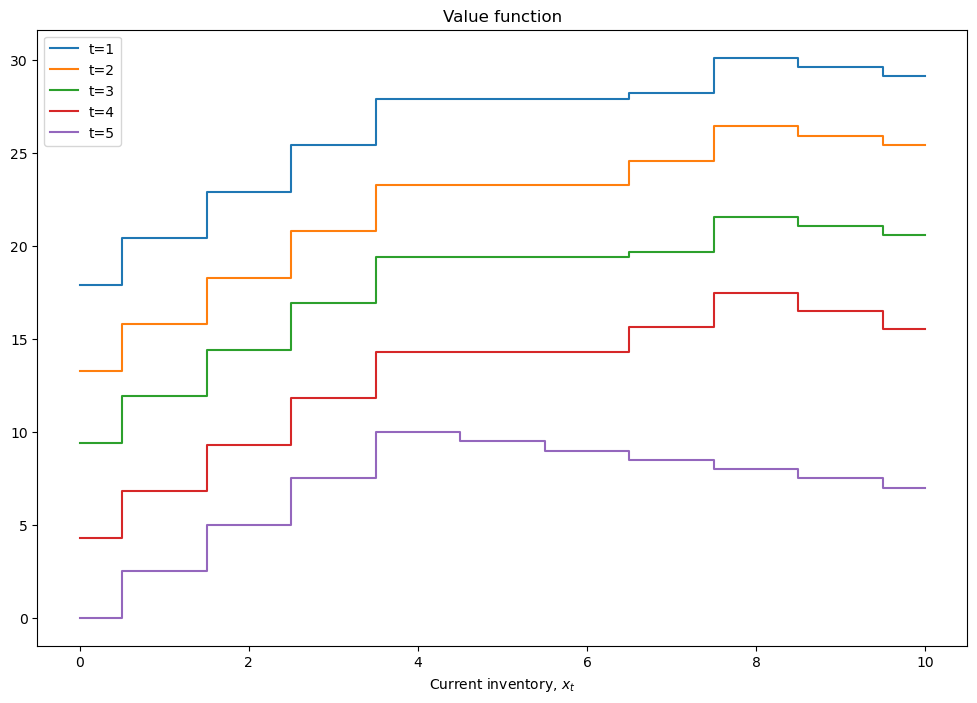

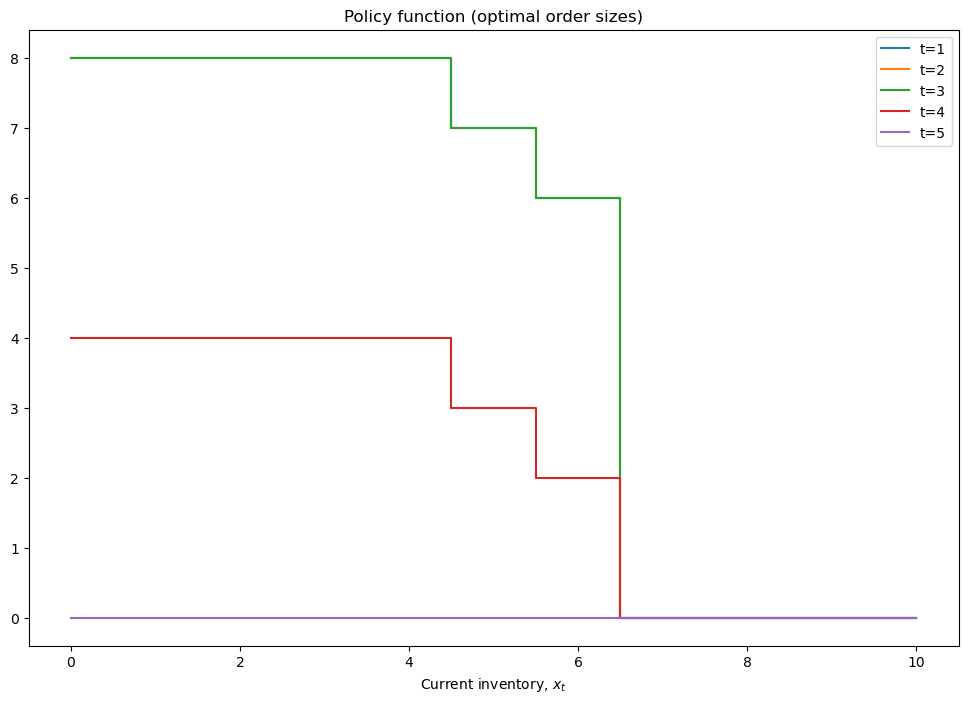

In [5]:
def plot_solution(model):
    plt.step(model.x,model.value,where='mid')
    plt.xlabel(r'Current inventory, $x_t$')
    plt.legend([f't={i+1}' for i in range(model.value.shape[1])])
    plt.title('Value function')
    plt.show()
    plt.step(model.x,model.policy,where='mid')
    plt.xlabel(r'Current inventory, $x_t$')
    plt.legend([f't={i+1}' for i in range(model.policy.shape[1])])
    plt.title('Policy function (optimal order sizes)')
    plt.show()

plot_solution(model)

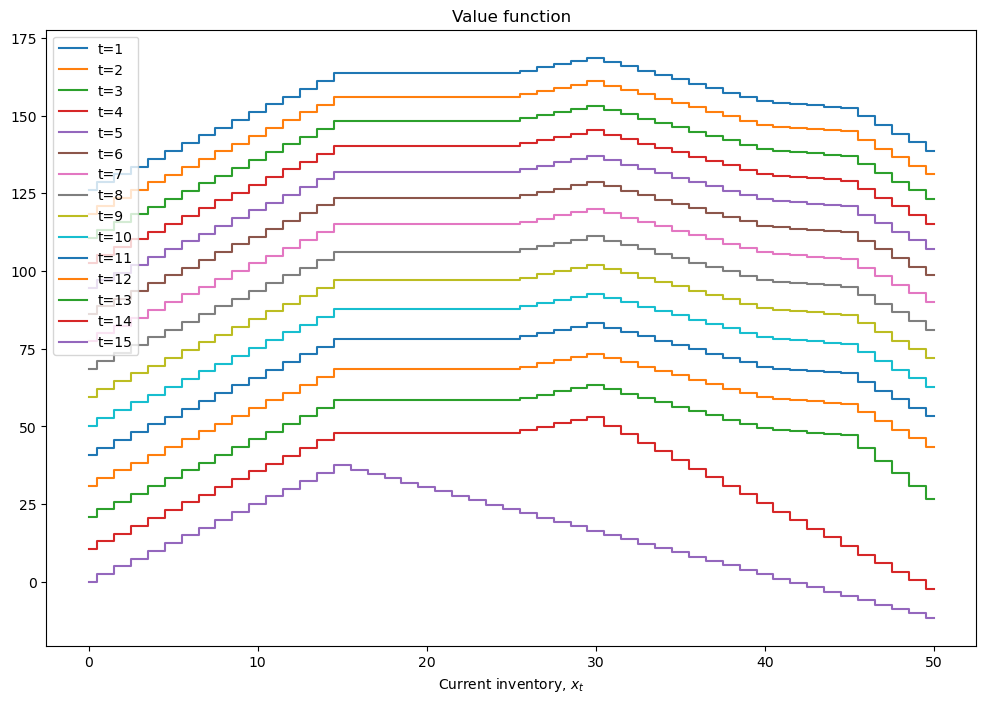

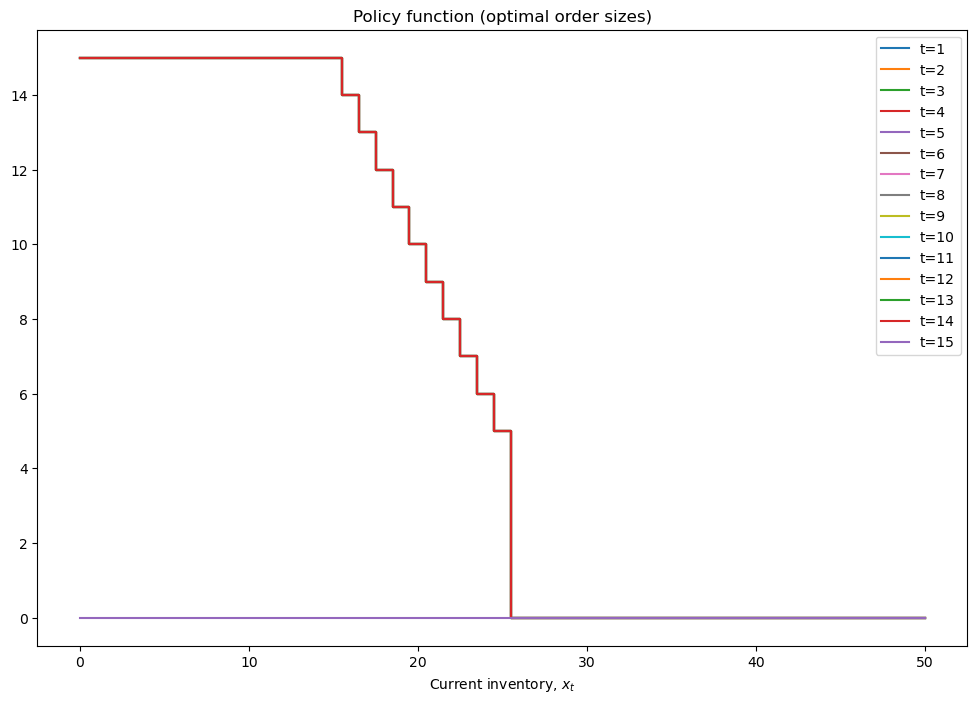

In [6]:
mod = inventory_model(label='production',max_inventory=50)
mod.demand = 15
mod.c = 5
mod.p = 2.5
mod.r = 1.4
mod.β = 0.975
mod = solver_backwards_induction(mod,T=15)
plot_solution(mod)

```{note}

Do we need to use backwards induction for the model above?

- we could set it as a multivariate optimization w.r.t. the vector $(q_0,\dots,q_T)$
- the objective can be rewritten by plugging in the maximand of in period $t+1$ into the equation for period $t$ using the transition equation $g(\cdot)$

Thus any deterministic infinite horizon problem can be written and solved as a standard constrained optimization problem

But as soon as we introduce uncertainty, this approach breaks down:
- there is no transition equation $g(\cdot)$ to plug in, instead there is a transition probability and an expectation
- the optimization problem in each period depends on the paramters (state variables) in a non-trivial way, and has to be solved separately for each value of parameters

```

## Infinite horizon and stochastic dynamic optimization problems

- $T = \infty$
- subscripts $t$ can be dropped
- solution of the model $V(s), x^\star(s)$ is time invariant
- Bellman equation is a proper functional equation where the value function $V(s)$ is an unknown

In infinite horizon the dynamic optimization problem
%
$$
V_t(s_t)
= \max_{x} \big[ f(x,s_t) + \beta V_{t+1}(s_{t+1}) \big] \\
\text {subject to } x \in \mathcal{D}_t(s_t)
$$
%
becomes a **fixed point** problem of a Bellman operator, i.e. the problem of solving a functional equation.

```{admonition} Definition
:class: caution

Let $B(S)$ denote a set of all bounded real-valued functions on a set $S \subset \mathbb{R}^K$.

**Bellman operator** is a mapping from $B(S)$ to itself defined as
%
$$
T \colon B(S) \ni V \mapsto \max_{x \in \mathcal{D}(s)} 
\big[ f(x,s) + \beta V\big(g(s,x)\big) \big] \in B(S)
$$
%
where:
- $f(x,s) \colon \mathbb{R}^N \times S \to \mathbb{R}$ is an instantaneous reward function
- $x \in \mathbb{R}^N$ are decision/choice variables
- $s \in S \subset \mathbb{R}^K$ are *state variables*
- state transitions are given by $s' = g(x,s)$ where $g \colon \mathbb{R}^N \times S \to S$
- $\mathcal{D}(s) \subset \mathbb{R}^N$ denotes the admissible set
- $\beta \in (0,1)$ is a discount factor
- $V(s) \colon S \to \mathbb{R}$ is a value function

```

Solution of the Bellman equation is given by a fixed point of the Bellman operator, i.e. such function $V(\cdot)$ which is mapped to itself by the Bellman operator, and the corresponding policy function
%
$$
x^\star(s) = \mathrm{argmax}_{x \in \mathcal{D}(s)} \big[ f(x,s) + \beta V\big(g(x,s)\big) \big]
$$
%

### Theory of dynamic programming

```{admonition} Definition: contraction mapping
:class: caution

Let $(S,\rho)$ be a complete metric space, i.e. a metric space where every Cauchy sequence converges to a point in $S$.

Let $T: S \rightarrow S$ denote an operator mapping $S$ to itself.
$T$ is called a *contraction* on $S$ with modulus $\lambda$ if $0 \le \lambda < 1$ and 
%
$$
\rho(Tx,Ty) \le \lambda \rho(x,y) \; \forall x,y \in S
$$
%
```

*Contraction mapping brings points in its domain "closer" to each other!*

```{admonition} Example
:class: tip

What is the value of annuity $V$ paying regular payments $c$ forever?
%
$$
 \stackrel{\nearrow}{V} \quad
   \stackrel{\searrow}{c} \quad
   \stackrel{\searrow}{c} \quad
   \stackrel{\searrow}{c} \quad
   \dots
$$
%
Let $r$ be the interest rate, then the value of annuity is given by
%
$$
 V=\quad
   \frac{c}{(1+r)^0} + \quad
   \frac{c}{(1+r)^1} + \quad
   \frac{c}{(1+r)^2} + \quad
   \frac{c}{(1+r)^3} + \quad
   \dots
$$
%
Equivalently with $\beta = \frac{1}{1+r}$
%
$$
V=\quad
c + \quad
c \beta + \quad
c \beta^2 + \quad
c \beta^3 + \quad
\dots
=
\sum_{t=0}^{\infty} \beta^t c
$$
%
Can reformulate recursively (as "Bellman equation" without choice)
%
$$
 V = c + \beta ( c + \beta c + \beta^2 c + \dots ) = c + \beta V
$$
%
with the corresponding "Bellman operator"
%
$$
T \colon V \mapsto c + \beta V
$$
%
Is $T(V)$ a contraction?
%
$$
|T(V_1) - T(V_2)| = |(c + \beta V_1) - (c + \beta V_2)| = \beta | V_1 - V_2 |
$$
%
Yes as long as long as $\beta < 1$!

- contraction mapping under Euclidean norm
- modulus of the contraction is $\beta$
```

Contractions are _invaluable_ because of uniqueness of their fixed point _and_ a surefire algorithm to compute them

```{admonition} Banach contraction mapping theorem (fixed point theorem)
:class: important

Let $(S,\rho)$ be a complete metric space with a contraction mapping $T: S \rightarrow S$.
Then 

1. $T$ admits a unique fixed-point $V^{\star} \in S \colon T(V^{\star}) = V^{\star}$ 
2. $V^{\star}$ can be found by repeated application of the operator $T$, i.e. $T^n(V) \rightarrow V^{\star}$ as $n\rightarrow \infty$

```

In other words, the fixed point can be found by successive approximations from any starting point $\rightarrow$ commonly known in economics as value function iterations (VFI) algorithm

```{admonition} Value function iterations (VFI) algorithm
:class: caution


1. Start with a guess for value function $V_0$, $i=0$
2. Apply Bellman operator to $V_i$ and increment $i$
%
$$
V_{i+1} = T(V_i)
$$
%
3. Repeat until convergence, i.e. $\| V_{i+1}-V_i \|<\epsilon$ for some small $\e

```

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class annuity():

    def __init__(self,c=1,beta=.9):
        self.c = c           # Annual payment
        self.beta = beta     # Discount factor
        self.analytic = c/(1-beta)  # compute analytic solution right away
    
    def bellman(self,V):
        '''Bellman equation'''
        return self.c + self.beta*V

    def solve(self, maxiter = 1000, tol=1e-4, verbose=False):
        '''Solves the model using successive approximations'''
        if verbose: print('{:<4} {:>15} {:>15}'.format('Iter','Value','Error'))
        V0=0
        for i in range(maxiter):
            V1=self.bellman(V0)
            if verbose: print('{:<4d} {:>15.8f} {:>15.8f}'.format(i,V1,V1-self.analytic))
            if abs(V1-V0) < tol:
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1

In [8]:
a = annuity(c=10,beta=0.92)
a.solve(verbose=True)
print('Numeric solution is ',a.solve())

Iter           Value           Error
0        10.00000000   -115.00000000
1        19.20000000   -105.80000000
2        27.66400000    -97.33600000
3        35.45088000    -89.54912000
4        42.61480960    -82.38519040
5        49.20562483    -75.79437517
6        55.26917485    -69.73082515
7        60.84764086    -64.15235914
8        65.97982959    -59.02017041
9        70.70144322    -54.29855678
10       75.04532776    -49.95467224
11       79.04170154    -45.95829846
12       82.71836542    -42.28163458
13       86.10089619    -38.89910381
14       89.21282449    -35.78717551
15       92.07579853    -32.92420147
16       94.70973465    -30.29026535
17       97.13295588    -27.86704412
18       99.36231941    -25.63768059
19      101.41333385    -23.58666615
20      103.30026715    -21.69973285
21      105.03624577    -19.96375423
22      106.63334611    -18.36665389
23      108.10267842    -16.89732158
24      109.45446415    -15.54553585
25      110.69810702    -14.30189298
2

Answer by the geometric series formula, assuming $\beta<1$
%
$$
 V = \sum_{t=0}^{\infty} \beta^t c = \frac{c}{1-\beta}
$$
%

In [9]:
print(f'Analytic solution is {a.analytic}')

Analytic solution is 125.00000000000006


**When is Bellman operator a contraction?**

%
$$
T(V)(\text{state}) = \max_{\text{decisions}} \big[ U(\text{state},\text{decision}) + \beta \mathbb{E}\big\{ V(\text{next state}) \big| \text{state},\text{decision} \big\} \big]
$$
%

- Bellman operator $T: U \rightarrow U$ from functional space $U$ to itself
- metric space $(U,d_{\infty})$ with uniform/infinity/sup norm (max abs distance between functions over their domain)



```{admonition} Blackwell sufficient conditions for contraction
:class: important

Let $X \subseteq \mathbb{R}^n$ and $B(x)$ be the space of bounded functions $f: X \rightarrow \mathbb{R}$ defined on $X$.
Suppose that $T: B(X) \rightarrow B(X)$ is an operator satisfying the following conditions:

1. (monotonicity) For any $f,g \in B(X)$ and $f(x) \le g(x)$ for all $x\in X$ implies $T(f)(x) \le T(g)(x)$ for all $x\in X$,
2. (discounting) There exists $\beta \in (0,1)$ such that

%
$$
T(f+a)(x) \le T(f)(x) + \beta a, \text{ for all } f\in B(X), a \ge 0, x\in X,
$$
%

Then $T$ is a contraction mapping with modulus $\beta$.

```

- Monotonicity of Bellman equation follows trivially due to maximization in $T(V)(x)$
- Discounting: satisfied by elementary argument when $\beta<1$

Bellman operator is contraction mapping by Blackwell condition as long as the value function is bounded and the discount factor is less than one

- In practical application with the upper bound on the state space, the value function is generally bounded
- In many applications the norm $\rho$ in the metric space can be adjusted to make the value function bounded

$\Rightarrow$

- unique solution
- VFI algorithm is globally convergent
- does not depend on the numerical implementation of the Bellman operator


```{admonition} Example: inventory management in infinite horizon
:class: tip

Return to the above example, now with the following modifications:
- time horizon is infinite
- demand is stochastic with known distribution

After dropping the time subscripts the Bellman equation is
%
$$
V(x,d) =
\max_{q \ge 0} \Big\{ 
(p+r) \min\{x,d\} - r x - c \mathbb{1}\{q>0\}
+ \beta \sum_{d'} V\big(x - \min\{x,d\} + q, d' \big) pr(d') \Big\}
$$
%
The sum in the RHS of the equation computes the expectation over realizations of discrete random demands $d'$, each happening with probability $pr(d')$.

We could solve the problem as is, but note that $d$ does not enter the "next period part" of the Bellman equation (due to the assumption that demand is idiosyncratic). In this case we can make our life easier by converting the problem of searching for the fixed point of the Bellman operator to the problem of searching the fixed point of the *expected* Bellman operator.

Taking the expectation of the Bellman equation over the distribution of demand $d$ on both sides, and denoting 
$EV(x) = \sum_{d} V(x,d) pr(d)$, we have
%
$$
EV(x) =
\sum_{d} \left[
\max_{q \ge 0} \Big\{ 
(p+r) \min\{x,d\} - r x - c \mathbb{1}\{q>0\}
+ \beta EV(x - \min\{x,d\} + q) \Big\}
\right ] pr(d)
$$
%
In the expected value function form the Bellman operator is also a contraction, but the fixed point now has to be solved only in the space of $x$ and not $x,d$. This is much easier for computational solver in the code below.

```

In [10]:
def bellman_ev(m,ev0):
    '''Bellman equation for inventory model
       Inputs: model object
               next period EXPECTED value function
    '''
    pr = m.demand_pr()
    ev1 = np.zeros(shape=m.x.shape)
    for j,d in enumerate(m.x):  # over all values of demand
        # create the grid of choices (same as x), column-vector
        q = m.x[:,np.newaxis]
        # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
        p = m.profit(m.x,d,q)
        # indexes for next period value with extrapolation using last value
        i = np.minimum(m.next_x(m.x,d,q),m.upper)
        # compute the Bellman maximand
        vm = p + m.β*ev0[i]
        # find max and argmax
        v1 = np.amax(vm,axis=0)  # maximum in every column
        ev1 = ev1 + pr[j]*v1
        q1 = None
    return ev1, q1

def solve_vfi(self,tol=1e-6,maxiter=500,callback=None):
    '''Solves the Rust model using value function iterations
    '''
    ev0 = np.zeros(self.n) # initial point for VFI
    for i in range(maxiter):  # main loop
        ev1, q1 = bellman_ev(self,ev0)  # update approximation
        err = np.amax(np.abs(ev0-ev1))
        if callback != None: callback(iter=i,err=err,ev1=ev1,ev0=ev0,q1=q1,model=self)
        if err<tol:
            break  # break out if converged
        ev0 = ev1  # get ready to the next iteration
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return ev1, q1

def solve_show(self,maxiter=1000,tol=1e-6,**kvargs):
    '''Illustrate solution'''

    fig1, (ax) = plt.subplots(1,1,figsize=(12,8))
    ax.grid(which='both', color='0.65', linestyle='-')
    ax.set_xlabel('Inventory')
    ax.set_title('Expected value function')
    def callback(**argvars):
        mod, ev, q = argvars['model'],argvars['ev1'],argvars['q1']
        ax.step(mod.x,ev,color='k',alpha=0.25,where='mid')
    ev,pk = solve_vfi(self,maxiter=maxiter,tol=tol,callback=callback,**kvargs)
    # add solutions
    ax.step(self.x,ev,color='r',linewidth=2.5,where='mid')
    plt.show()

def optimal_policy(m,ev):
    '''Computes the optimal policy function for the stochastic
    inventory dynamics model for given EV function'''
    # idea: 3-dim array with q in axes 0, d in axis 1 and x in axis 2
    q = m.x[:,np.newaxis,np.newaxis]  # choices
    d = m.x[np.newaxis,:,np.newaxis]  # demand
    x = m.x[np.newaxis,np.newaxis,:]  # inventories
    # compute current period profit (relying on numpy broadcasting to get the matrix with choices in rows)
    p = m.profit(x,d,q)  # 3-dim array
    # indexes for next period value with extrapolation using last value
    i = np.minimum(m.next_x(x,d,q),m.upper)
    # compute the Bellman maximand
    vm = p + m.β*ev[i]
    # find argmax and argmax
    return np.argmax(vm,axis=0)  # maximum in every column


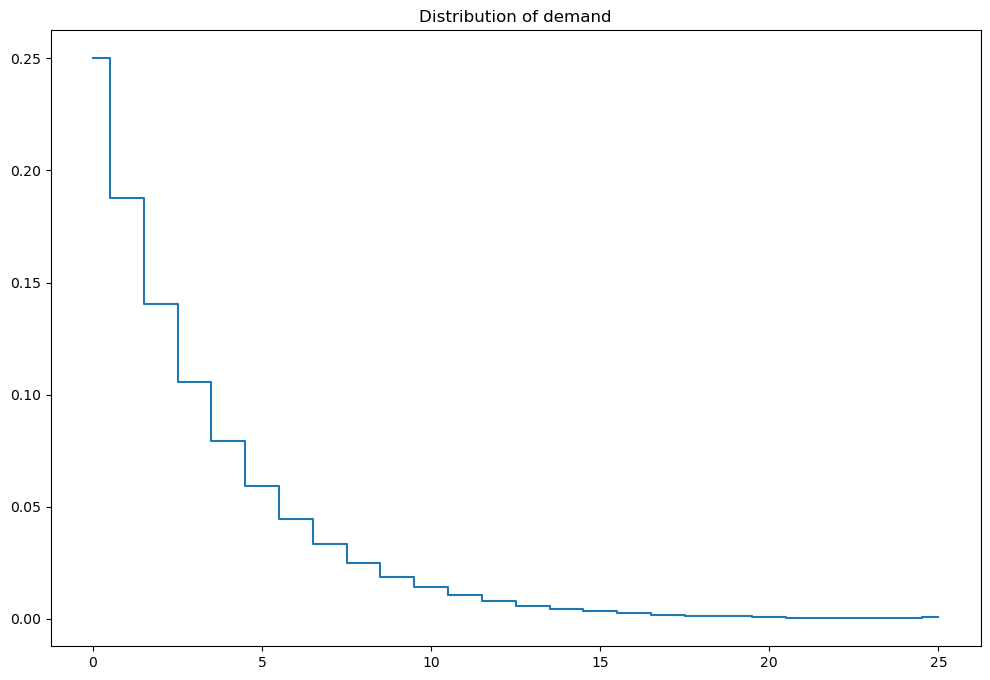

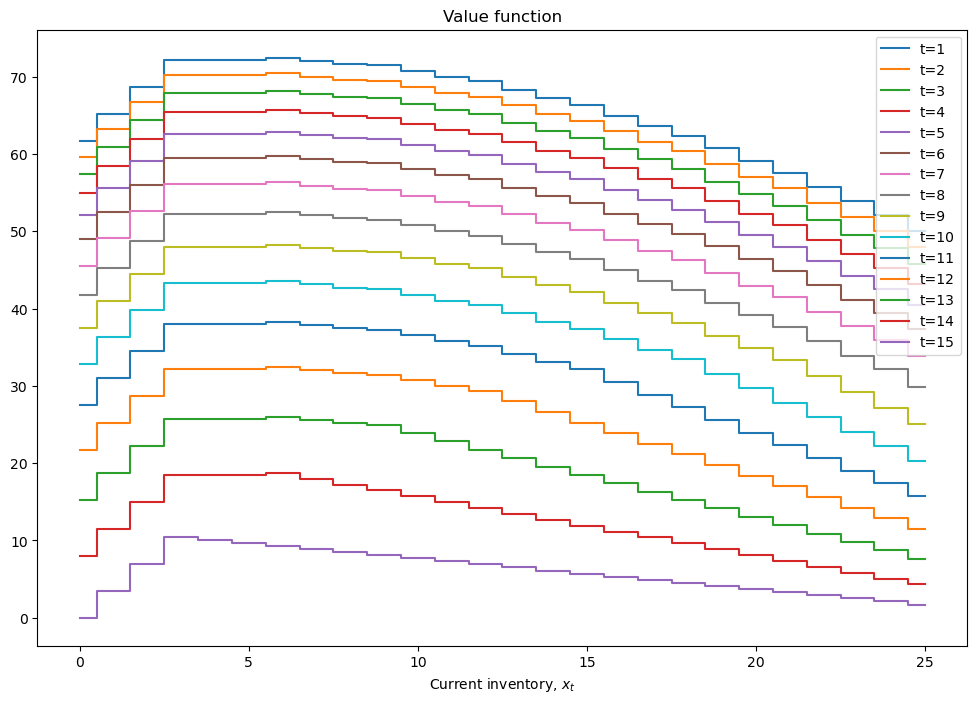

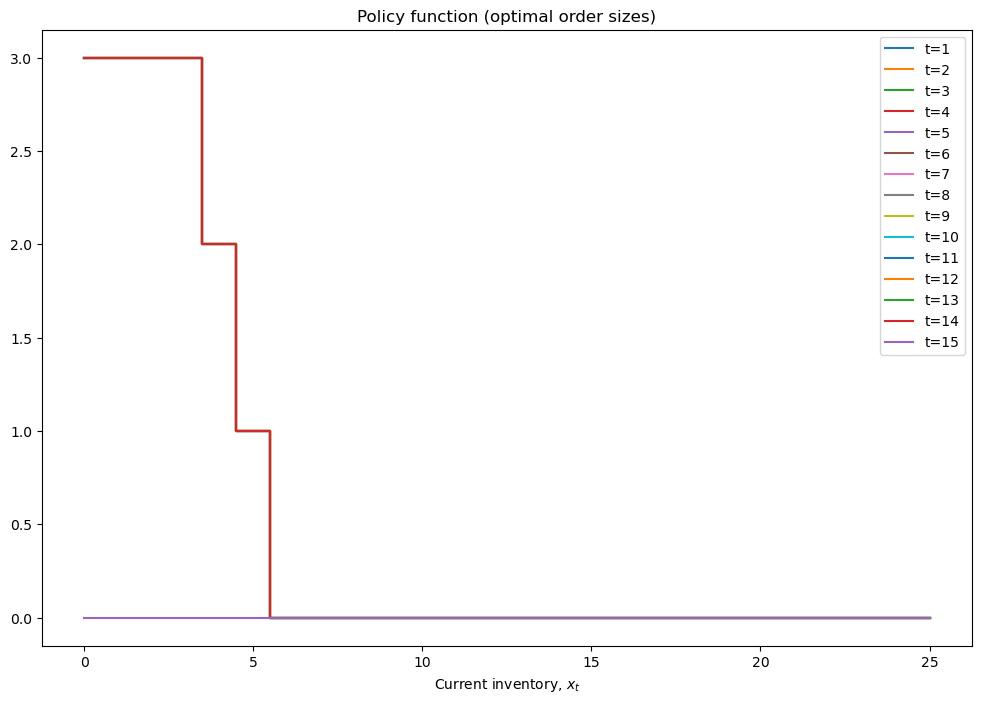

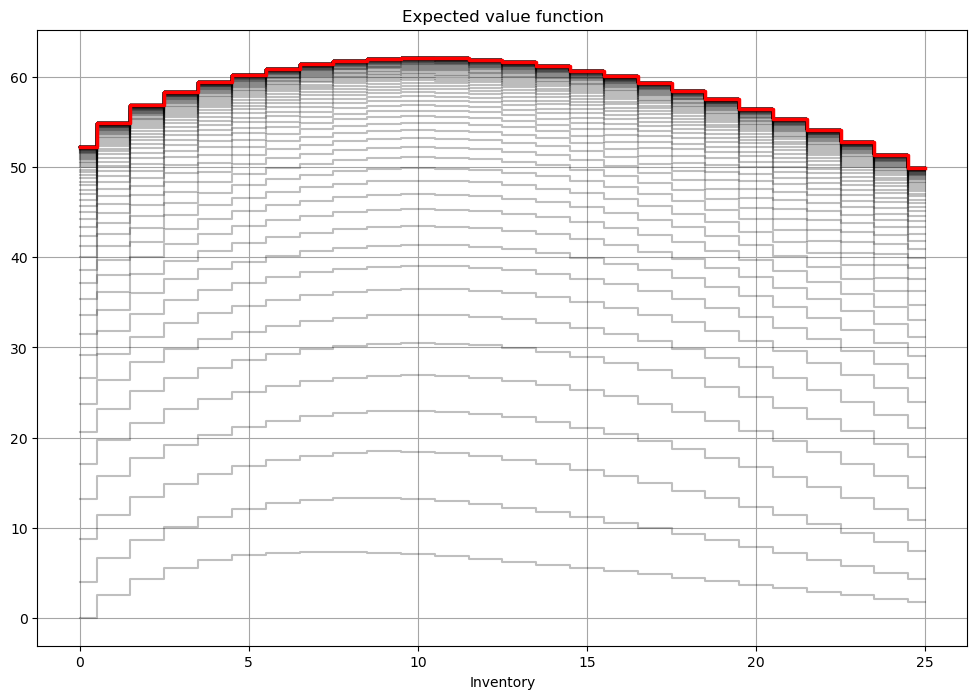

Optimal orders of new inventory for d,x:
(d in rows, x in columns)
[[7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0 0]
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 5 4 3 2 0 0 0 0

In [11]:
mod = inventory_model(label='production',max_inventory=25)
mod.dp=.25
mod.demand = int((1-mod.dp)/mod.dp)
mod.c = .25
mod.p = 3.5
mod.r = 0.4
mod.β = 0.9
mod.demand_pr(plot=True)
mod = solver_backwards_induction(mod,T=15)
plot_solution(mod)

ev,q = solve_vfi(mod)
solve_show(mod)
q = optimal_policy(mod,ev)
print('Optimal orders of new inventory for d,x:\n(d in rows, x in columns)')
print(q)


```{note}
Note the symmetry in the optimal policy!
This implies that knowing both $x$ and $d$ is not necessary for the optional new order, it's enough to condition on the inventory remaining after sales, i.e. $x-\min(x,d) = \max(0,x-d)$
```

<!-- ### Other classes of dynamic optimization problems

Classification by various criteria:

1. Nature of time
  - discrete time: here
  - continuous time: studied in the *calculus of variation*, *optimal control theory* and other branches of math

2. Uncertainty in the beliefs of the decision makers
  - deterministic problems: all transition rules are given by laws of motion, i.e. mappings from states and choices to next period states
  - stochastic problems: some transitions rules are given by conditional densities or transition probabilities from current to next period states

3. Structure of choice and state space
  - discrete 
  - continuous
  - mixed discrete-continuous
 -->

## Extra material

- Computer science view on DP https://www.techiedelight.com/introduction-dynamic-programming
- Popular optimal stopping https://www.americanscientist.org/article/knowing-when-to-stop
- For more details the inventory problem see [my screencast on writing this code](https://youtu.be/JSdjTmaXr0w)